In [1]:
import numpy as np
import mat73
import scipy.io as sio
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from dipy.align import affine_registration
from scipy.io import savemat

In [2]:
# Change the following line for a new case
data_address = 'C://Users//Gundogdu//Desktop//University of Chicago//PATIENT_DATA//IRB17//pat083//master.mat'

In [3]:
print('Loading data')
try:
    data = sio.loadmat(data_address)
except NotImplementedError:
    data = mat73.loadmat(data_address)
print('Data loaded')

Loading data


ERROR:root:ERROR: MATLAB type not supported: string, (uint32)
ERROR:root:ERROR: MATLAB type not supported: string, (uint32)
ERROR:root:ERROR: MATLAB type not supported: images.roi.Freehand, (uint32)


Data loaded


In [8]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + color.GREEN + 'The variables in this data file are:' + color.END)
for f in data.keys():
    try:
        print(f'{f} : {data[f].shape}')
    except:
        continue

hybrid_data = data['hybrid_data']

The variables in this data file are:
DCE : (192, 192, 53, 60)
I : (128, 128)
I_s_rs : (128, 128)
T1 : (400, 400, 34)
T2 : (576, 576, 34)
T2_3D : (576, 576, 34)
TE : (4,)
TE_norm : (4,)
adc : (128, 128)
areScaled : ()
b : (4,)
b0 : (128, 128, 34)
b1 : (128, 128, 34, 6)
b2 : (128, 128, 34, 6)
b3 : (128, 128, 34, 12)
b4 : (128, 128, 34, 18)
bb : (4,)
benign_mask : (128, 128, 34)
bw : (128, 128)
cancer_mask : (128, 128, 34)
col : ()
hybrid_data : (128, 128, 34, 4, 4)
img2 : (128, 128, 4)
mask : (128, 128)
noise_mask : (128, 128, 34)
numSlices : ()
prostate_mask : (128, 128, 34)
raw : (128, 128, 34, 5, 3, 6)
rgbI : (128, 128, 3)
row : ()
scanned_image : (576, 576, 34)
slice : ()
val : (2,)
verified : ()


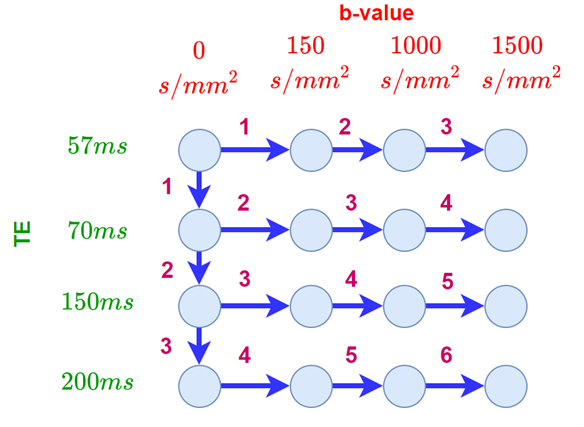

In [11]:
from IPython import display
display.Image("schedule.png")

In [10]:
out = hybrid_data.copy()
schedule = [([0,0],[1,0]),#2
            ([0,0],[0,1]),#2
            ([0,1],[1,1]),#3
            ([1,0],[2,0]),#3
            ([0,1],[0,2]),#3
            ([2,0],[3,0]),#4
            ([1,1],[2,1]),#4
            ([0,2],[1,2]),#4
            ([0,2],[0,3]),#4
            ([2,1],[3,1]),#5
            ([1,2],[2,2]),#5
            ([0,3],[1,3]),#5
            ([2,2],[3,2]),#6
            ([1,3],[2,3]),#6
            ([2,3],[3,3]),#7
           ]
images = [["b0 - t57", "b0 - t70", "b0 - t150", "b0 - t200"],
          ["b150 - t57", "b150 - t70", "b150 - t150", "b150 - t200"],
          ["b1000 - t57", "b1000 - t70", "b1000 - t150", "b1000 - t200"],
          ["b1500 - t57", "b1500 - t70", "b1500 - t150", "b1500 - t200"]
         ]

pipeline = ["center_of_mass", "translation", "rigid", "affine"]
identity = np.eye(4)

In [12]:
for _from, _to in tqdm(schedule):
    #print(f'Using {_from} as static and {_to} as moving')
    static = np.squeeze(out[:, :, :, _from[0], _from[1]])
    moving = np.squeeze(hybrid_data[:, :, :, _to[0], _to[1]])
    fig, ax = plt.subplots(1,4, figsize=(30, 10))
    ax[0].imshow(static[:,:,12], cmap='gray')
    ax[0].axis('off')
    ax[0].set_title(f'static ({images[_from[0]][_from[1]]})', fontsize=25)
    #ax[0].imshow(static[:,:,12], cmap='Greens', alpha=0.5)

    # ######################### This part is the Registration #######################
    level_iters = [1000, 100, 10]
    sigmas = [2.0, 1.0, 0.0]
    factors = [3, 2, 1]
    xformed_img, reg_affine = affine_registration(
    moving,
    static,
    moving_affine=identity,
    static_affine=identity,
    nbins=64,
    metric='MI',
    pipeline=pipeline,  
    level_iters=level_iters,
    sigmas=sigmas,
    factors=factors)

    ax[1].imshow(moving[:, :, 12], cmap='gray')
    ax[1].axis('off')
    ax[1].set_title(f'moving ({images[_to[0]][_to[1]]})', fontsize=25)
    diff = xformed_img - moving
    ax[2].imshow(diff[:, :, 12], cmap='jet')
    ax[2].axis('off')
    ax[2].set_title(f'diff after affine warping', fontsize=25)

    # ################################################################################
    out[:, :, :, _to[0], _to[1]] = xformed_img
    ax[3].imshow(xformed_img[:, :, 12], cmap='gray')
    ax[3].axis('off')
    ax[3].set_title(f'after warping', fontsize=25)

  0%|          | 0/15 [00:00<?, ?it/s]

Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 100]
Optimizing level 0 [max iter: 10]
Optimizing level 2 [max iter: 1000]
Optimizing level 1 

In [ ]:
data2 = dict()
data2['registered_hybrid'] = out
sio.savemat('C://Users//Gundogdu//Desktop//University of Chicago//PATIENT_DATA//IRB17//pat083//master3.mat', data2)